In [ ]:
def numerical_diff(f, x):
    h = 10e-50
    return (f(x+h) - f(x)) / h

In [5]:
import numpy as np
np.float32(1e-50)

0.0

In [8]:
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

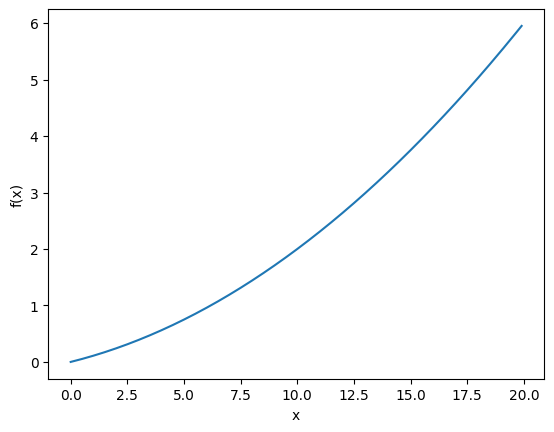

In [6]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

import numpy as np
import matplotlib.pylab as plt
x = np.arange(0.0, 20.0, 0.1) # 以0.1为单位，从0到20的数组x
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [9]:
numerical_diff(function_1, 5)

0.1999999999990898

In [10]:
numerical_diff(function_1, 10)

0.2999999999986347

0.2999999999986347
-0.9999999999863469


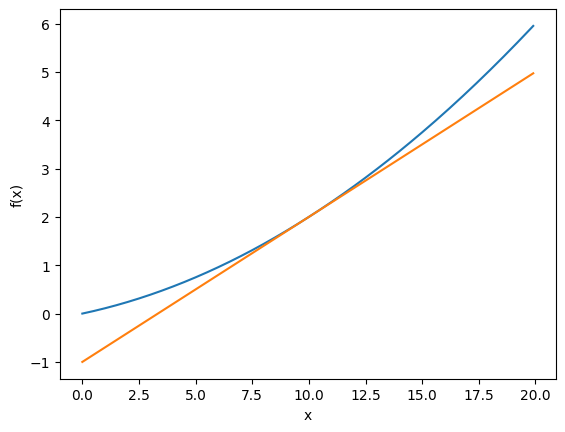

In [16]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt


def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)


def function_1(x):
    return 0.01*x**2 + 0.1*x 


def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    print(y)
    return lambda t: d*t + y
     
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 10)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()


In [17]:
import numpy as np

def softmax(x):
    # softmax激活函数
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T

    x = x - np.max(x) # 溢出对策
    return np.exp(x) / np.sum(np.exp(x))

def cross_entropy_error(y, t):
    # 交叉熵误差
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    # 监督数据是one-hot-vector的情况下，转换为正确解标签的索引
    if t.size == y.size:
        t = t.argmax(axis=1)
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

def numerical_gradient(f, x):
    # 计算所有参数x的梯度
    h = 1e-4  # 0.0001
    grad = np.zeros_like(x)
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)  # f(x+h)

        x[idx] = tmp_val - h
        fxh2 = f(x)  # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2 * h)

        x[idx] = tmp_val  # 还原值
        it.iternext()
    return grad

class simpleNet:
    def __init__(self):
        # 2 X 3的单层神经网络为例求梯度
        self.W = np.random.randn(2,3)

    def predict(self, x):
        # 计算预测值
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        # 使用sofmax为激活函数
        y = softmax(z)
        # 使用交叉熵误差
        loss = cross_entropy_error(y, t)
        return loss

x = np.array([0.6, 0.9])
t = np.array([0, 0, 1])

net = simpleNet()
# 损失函数
f = lambda w: net.loss(x, t)
# 损失函数的梯度
dW = numerical_gradient(f, net.W)
print(dW)


[[ 0.23260985  0.25717526 -0.48978512]
 [ 0.34891478  0.3857629  -0.73467768]]
